<h1 align = 'center'>人工神经网络简介</h1>  
<img src = "face.jpg", height = 200 px, width = 200 px, align = 'center'>

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. 损失函数

In [2]:
# 1.1 均方误差
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# 设“2”为正确解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 例1： “2”的概率最高的情况（0.6）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print("例1：", mean_squared_error(np.array(y), np.array(t)))

# 例2： “7”的概率最高的情况（0.6）
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print("例2：", mean_squared_error(np.array(y), np.array(t)))

例1： 0.09750000000000003
例2： 0.5975


In [3]:
# 1.2 交叉熵误差
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

# 设“2”为正确解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 例3： “2”的概率最高的情况（0.6）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print("例3：", cross_entropy_error(np.array(y), np.array(t)))

# 例4： “7”的概率最高的情况（0.6）
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print("例4：", cross_entropy_error(np.array(y), np.array(t)))

例3： 0.510825457099338
例4： 2.302584092994546


# 2. 数值微分（导数和偏导）

0.1999999999990898


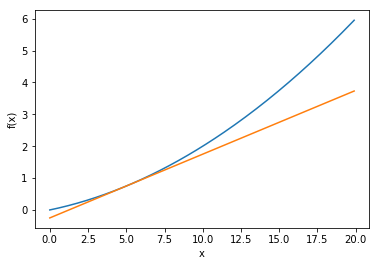

In [4]:
# 求数值微分的函数
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

# 示例函数
def function_1(x):
    return 0.01*x**2 + 0.1*x 

# 画切线
def tangent_line(f, x):
    d = numerical_diff(f, x)
    #打印梯度值
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()
# 打印的值为当前x的梯度值

# 3. 梯度

/Users/chenhaopeng/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


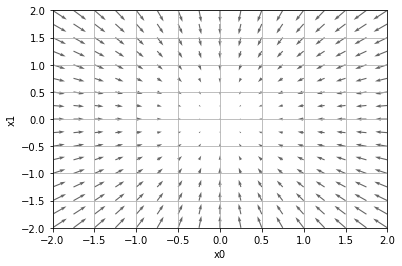

In [5]:
# 求单点的梯度（no_batch）
def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)# 生成和x形状相同的数组
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)的计算
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)的计算
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 还原值
        
    return grad

# 求一组点的梯度（batch）
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

# 示例函数
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

# 画图函数
def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

# 开始画图
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]))

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

# 4. 梯度下降法

x最终值： [-6.11110793e-10  8.14814391e-10]


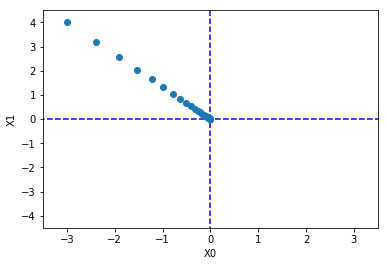

In [6]:
# 梯度下降法
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

# 示例函数
def function_2(x):
    return x[0]**2 + x[1]**2

# 初始点
init_x = np.array([-3.0, 4.0])    

# 学习率和重复次数
lr = 0.1
step_num = 100

# 开始计算
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)
print("x最终值：", x)
# print("x计算过程：\n", x_history)

# 画图表示
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

# 5. 神经网络的梯度

1 单层神经网络及梯度

In [7]:
from common.functions import *

In [8]:
# 单层神经网络实现
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)# 初始化2*3的W矩阵

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)# 交叉熵误差函数作为损失函数

        return loss

# 计算某一点处的梯度
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)# 梯度计算

print(dW)

[[ 0.11537178  0.42192909 -0.53730087]
 [ 0.17305767  0.63289363 -0.8059513 ]]


2 2层神经网络的实现

In [9]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 使用神经网络进行识别
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:输入数据, t:监督数据
    # 计算损失函数的值
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    # 计算识别精度
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    # 计算权重参数的梯度
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    # 计算权重参数的梯度。
    # numerical_gradient()的高速版
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads
        

3 神经网络的学习

In [10]:
from dataset.mnist import load_mnist
from common.functions import *

# 载入mnist训练数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7864833333333333, 0.7894
train acc, test acc | 0.8799166666666667, 0.8834
train acc, test acc | 0.8982333333333333, 0.9023
train acc, test acc | 0.9079333333333334, 0.911
train acc, test acc | 0.9143666666666667, 0.9162
train acc, test acc | 0.92015, 0.9227
train acc, test acc | 0.9246, 0.9273
train acc, test acc | 0.9275666666666667, 0.9295
train acc, test acc | 0.9326, 0.9333
train acc, test acc | 0.9349166666666666, 0.9349
train acc, test acc | 0.9371666666666667, 0.9361
train acc, test acc | 0.93905, 0.9387
train acc, test acc | 0.9417, 0.9402
train acc, test acc | 0.9438666666666666, 0.9412
train acc, test acc | 0.9452666666666667, 0.9432
train acc, test acc | 0.9473833333333334, 0.9438


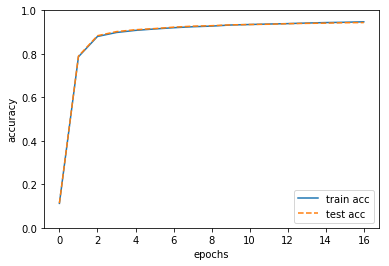

In [11]:
# 初始化网络
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 超参数
iters_num = 10000  
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 平均每个epoch的重复次数
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 计算梯度
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 记录学习过程
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 计算每个epoch的识别精度
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 训练数据和测试数据的识别精度的推移（横轴的单位是epoch）
# 画图
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()